In [25]:
import pandas as pd
import numpy as np
from datetime import datetime
import re
import csv
import seaborn as sns
import matplotlib.pyplot as plt

STAGE 1 - MERGING DATASETS

In [26]:
#Preparing the dataset
pd.set_option('display.max_rows', None) 
pd.set_option('display.max_columns', None)

df_flashbay = pd.read_csv('data/data_flashbay_clean.csv', engine='python')
df_steelseries = pd.read_csv('data/data_steelseries_clean.csv', engine='python')
df_asda = pd.read_csv('data/data_asda_clean.csv', engine='python')
df_quicken = pd.read_csv('data/data_quicken_clean.csv', engine='python')



In [27]:
#Add the name of the company as a column to each dataset

df_flashbay['company'] = 'Flashbay'
df_steelseries['company'] = 'SteelSeries'
df_asda['company'] = 'Asda'
df_quicken['company'] = 'Quicken'

In [28]:
#Check compatibility of the three datasets for merging

print("These are the names of the columns present in Flashbay: ", "\n", df_flashbay.columns)
print("These are the names of the columns present in SteelSeries: ", "\n", df_steelseries.columns)
print("These are the names of the columns present in Asda: ", "\n", df_asda.columns)
print("These are the names of the columns present in Quicken: ", "\n", df_quicken.columns)

print("The Flashbay dataset has ", df_flashbay.shape[1], "columns")
print("The SteelSeries dataset has ", df_steelseries.shape[1], "columns")
print("The Asda dataset has ", df_asda.shape[1], "columns")
print("The Quicken dataset has ", df_quicken.shape[1], "columns")

print("The Flashbay dataset has ", df_flashbay.shape[0], "rows")
print("The SteelSeries dataset has ", df_steelseries.shape[0], "rows")
print("The Asda dataset has ", df_asda.shape[0], "rows")
print("The Quicken dataset has ", df_quicken.shape[0], "rows")


These are the names of the columns present in Flashbay:  
 Index(['username', 'number_reviews', 'location', 'rating', 'text',
       'date_of_experience', 'date_posted', 'verification', 'subject',
       'page_number', 'answer', 'company'],
      dtype='object')
These are the names of the columns present in SteelSeries:  
 Index(['username', 'number_reviews', 'location', 'rating', 'text',
       'date_of_experience', 'date_posted', 'verification', 'subject',
       'page_number', 'answer', 'company'],
      dtype='object')
These are the names of the columns present in Asda:  
 Index(['username', 'number_reviews', 'location', 'rating', 'text',
       'date_of_experience', 'date_posted', 'verification', 'subject',
       'page_number', 'answer', 'company'],
      dtype='object')
These are the names of the columns present in Quicken:  
 Index(['username', 'number_reviews', 'location', 'rating', 'text',
       'date_of_experience', 'date_posted', 'verification', 'subject',
       'page_num

In [29]:
display(df_flashbay.head())


,username,number_reviews,location,rating,text,date_of_experience,date_posted,verification,subject,page_number,answer,company
0,Rob Crane,2 reviews,CA,5,The company rep I worked with made my transact...,"June 15, 2024",2024-10-23 04:17:44,Redirected,The company rep I worked with made my…,1.0,NaN,Flashbay
1,Pat Anderson,1 review,US,5,I highly recommend using Flashbay. Immediately...,"October 16, 2024",2024-10-16 19:34:05,Verified,I highly recommend using Flashbay,1.0,NaN,Flashbay
2,Margarita Orlova,1 review,CZ,5,I had the pleasure of working with Shelby Gibs...,"October 10, 2024",2024-10-17 10:27:44,Verified,Great customer service,1.0,NaN,Flashbay
3,Paola Rivas,1 review,US,5,I had a fantastic experience with Brian Truong...,"October 21, 2024",2024-10-21 22:38:50,Verified,Outstanding Support and Attentive Service,1.0,NaN,Flashbay
4,Fiona Mckelvey Keenan,3 reviews,CA,5,My number-one go-to for computer accessories. ...,"July 11, 2024",2024-10-23 04:09:05,NaN,My number-one go-to for computer…,1.0,NaN,Flashbay


In [30]:
display(df_steelseries.head())

,username,number_reviews,location,rating,text,date_of_experience,date_posted,verification,subject,page_number,answer,company
0,Consumer,1 review,CY,5,I paid 60€ for QcK Prism Gaming Mouse Pad and ...,"October 17, 2024",2024-10-19 21:26:17,NaN,"Ultra fast delivery,Excellent CustSuppot…",1,Hey there!Just wanted to drop a quick message ...,SteelSeries
1,ulices Alfice,1 review,GB,1,I was having issues with my old headphones and...,"October 01, 2024",2024-10-19 22:08:56,NaN,Do not purchase from them directly.,1,NaN,SteelSeries
2,PHILIP DAMIANO,1 review,US,1,My APEX PRO TKL (2023) just stop turning on on...,"October 09, 2024",2024-10-12 14:39:07,NaN,My APEX PRO TKL (2023) just stop…,1,Hello Philip - Thank you for taking the time t...,SteelSeries
3,dj,7 reviews,BE,1,Why? Because their RMA is awful. It is an endl...,"October 01, 2024",2024-10-06 18:08:33,NaN,Don't buy directly from SteelSeries,1,Hello - Thank you for taking the time to write...,SteelSeries
4,Charlie Watson,4 reviews,GB,5,My son loves these headphones. Unfortunately o...,"August 31, 2024",2024-08-31 01:15:19,NaN,Arctis nova 1,1,Hey there!Just wanted to drop a quick message ...,SteelSeries


In [31]:
display(df_asda.head())

,username,number_reviews,location,rating,text,date_of_experience,date_posted,verification,subject,page_number,answer,company
0,Darren Bolton,16 reviews,GB,1.0,Buy at least 2 online shops per week at Asda s...,"October 21, 2024",2024-10-21 17:17:36,NaN,Every little helps....,1.0,NaN,Asda
1,jane nicholas,10 reviews,GB,3.0,Unlike others on here I do have to start on a ...,"October 20, 2024",2024-10-22 17:18:35,NaN,Unlike others on here I do have to…,1.0,NaN,Asda
2,Paul Zuchlinski,1 review,GB,1.0,I put £20.01 in the tank & got charged £99 I h...,"October 20, 2024",2024-10-20 20:09:06,NaN,I put £20.01 in the tank & got charged…,1.0,NaN,Asda
3,Katarzyna,6 reviews,GB,1.0,Absolutely shocking experience EACH TIME. This...,"October 22, 2024",2024-10-22 13:14:54,NaN,Absolutely shocking experience EACH…,1.0,NaN,Asda
4,bobozilla,7 reviews,GB,1.0,Worst service imaginable. They do not deliver ...,"October 19, 2024",2024-10-20 17:26:31,NaN,Worst service imaginable,1.0,NaN,Asda


In [32]:
display(df_quicken.head())

,username,number_reviews,location,rating,text,date_of_experience,date_posted,verification,subject,page_number,answer,company
0,Kevin H,1 review,US,5,I have been using Quicken since 1991. I depen...,"October 21, 2024",2024-10-21 13:45:22,Verified,I have been using Quicken since 1991,1,NaN,Quicken
1,Edward Campbell,1 review,US,3,Quicken is the only product that can perf...,"October 22, 2024",2024-10-22 15:25:09,Verified,Functions but buggy and expensive,1,NaN,Quicken
2,Ronald Davis,5 reviews,US,4,I have been using Quicken to manage my finance...,"October 21, 2024",2024-10-21 19:26:40,Verified,2 Decade User,1,NaN,Quicken
3,Robert,4 reviews,US,5,Product has been more stable and consistently ...,"October 20, 2024",2024-10-21 01:40:21,Verified,Product has been more stable and…,1,NaN,Quicken
4,G Bailey,1 review,US,3,I have used Quicken since it first came out. ...,"October 15, 2024",2024-10-22 16:22:49,Verified,I have used Quicken since it first came…,1,NaN,Quicken


In [33]:
#Merging datasets into one
df_trustpilot_3 = pd.concat([df_flashbay, df_steelseries], axis=0)
df_trustpilot_2 = pd.concat([df_trustpilot_3, df_asda], axis=0)
df_trustpilot = pd.concat([df_trustpilot_2, df_quicken], axis=0)

display(df_trustpilot.head())

,username,number_reviews,location,rating,text,date_of_experience,date_posted,verification,subject,page_number,answer,company
0,Rob Crane,2 reviews,CA,5.0,The company rep I worked with made my transact...,"June 15, 2024",2024-10-23 04:17:44,Redirected,The company rep I worked with made my…,1.0,NaN,Flashbay
1,Pat Anderson,1 review,US,5.0,I highly recommend using Flashbay. Immediately...,"October 16, 2024",2024-10-16 19:34:05,Verified,I highly recommend using Flashbay,1.0,NaN,Flashbay
2,Margarita Orlova,1 review,CZ,5.0,I had the pleasure of working with Shelby Gibs...,"October 10, 2024",2024-10-17 10:27:44,Verified,Great customer service,1.0,NaN,Flashbay
3,Paola Rivas,1 review,US,5.0,I had a fantastic experience with Brian Truong...,"October 21, 2024",2024-10-21 22:38:50,Verified,Outstanding Support and Attentive Service,1.0,NaN,Flashbay
4,Fiona Mckelvey Keenan,3 reviews,CA,5.0,My number-one go-to for computer accessories. ...,"July 11, 2024",2024-10-23 04:09:05,NaN,My number-one go-to for computer…,1.0,NaN,Flashbay


STAGE 2 - DATASET INSPECTIONS

In [34]:
#Inspecting the full dataset

print("These are the names of the columns present: ", "\n", df_trustpilot.columns)
print("The dataset has ", df_trustpilot.shape[1], "columns")
print("The dataset has ", df_trustpilot.shape[0], "rows")

These are the names of the columns present:  
 Index(['username', 'number_reviews', 'location', 'rating', 'text',
       'date_of_experience', 'date_posted', 'verification', 'subject',
       'page_number', 'answer', 'company'],
      dtype='object')
The dataset has  12 columns
The dataset has  84106 rows


In [35]:
#Deleting the page_number column as it is no longer needed or relevant

df_trustpilot.drop(columns=['page_number'], inplace=True)

#Verifying the output
print("These are the names of the columns present: ", "\n", df_trustpilot.columns)
print("The dataset has ", df_trustpilot.shape[1], "columns")
print("The dataset has ", df_trustpilot.shape[0], "rows")

These are the names of the columns present:  
 Index(['username', 'number_reviews', 'location', 'rating', 'text',
       'date_of_experience', 'date_posted', 'verification', 'subject',
       'answer', 'company'],
      dtype='object')
The dataset has  11 columns
The dataset has  84106 rows


In [36]:
print("Printing the relevant information from the file such as type per variable: ", "n")
print(df_trustpilot.info())

Printing the relevant information from the file such as type per variable:  n
<class 'pandas.core.frame.DataFrame'>
Index: 84106 entries, 0 to 32319
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   username            84089 non-null  object 
 1   number_reviews      84106 non-null  object 
 2   location            84106 non-null  object 
 3   rating              84106 non-null  float64
 4   text                78420 non-null  object 
 5   date_of_experience  84106 non-null  object 
 6   date_posted         84106 non-null  object 
 7   verification        67053 non-null  object 
 8   subject             84103 non-null  object 
 9   answer              20360 non-null  object 
 10  company             84106 non-null  object 
dtypes: float64(1), object(10)
memory usage: 7.7+ MB
None


In [37]:
#Converting rating to integer

print(df_trustpilot['rating'].unique())

df_trustpilot['rating'] = df_trustpilot['rating'].astype('int')


[5. 4. 1. 3. 2.]


In [38]:
#Amending the dataset
#number_reviews: Removing 'review(s)' from cell and converting to an integer
df_trustpilot['number_reviews'] = df_trustpilot['number_reviews'].str.replace('(?i)reviews', '', regex=True).str.strip()
df_trustpilot['number_reviews'] = df_trustpilot['number_reviews'].str.replace('(?i)review', '', regex=True).str.strip()
print(df_trustpilot['number_reviews'].value_counts())
df_trustpilot['number_reviews'] = df_trustpilot['number_reviews'].astype(int)

#Verifying output
print(df_trustpilot.info())
print(df_trustpilot.head())

number_reviews
1      47523
2      14389
3       6486
4       3515
5       2175
6       1476
7       1092
8        831
9        675
10       556
11       510
12       415
13       373
14       293
15       283
16       243
18       194
17       191
19       189
21       178
22       154
23       145
20       134
24       132
26       127
25       116
27        93
29        77
28        75
30        72
33        68
32        67
36        57
31        56
35        55
39        53
34        51
37        48
38        41
41        39
40        34
50        34
42        33
43        32
44        31
46        29
45        28
56        26
47        25
53        25
55        24
48        24
52        22
49        20
63        18
54        16
60        16
58        15
57        15
59        14
66        14
62        14
67        13
51        13
68        12
61        12
69        12
64        12
71        10
65         9
73         9
77         8
79         8
90         7
88         7
78        

In [39]:
#date_of_experience: Converting to datetime format
df_trustpilot['date_of_experience'] = pd.to_datetime(df_trustpilot['date_of_experience'], errors='coerce')

#date_posted: convert to datetime format
df_trustpilot['date_posted'] = pd.to_datetime(df_trustpilot['date_posted'])

print(df_trustpilot.info())
print(df_trustpilot.head())

<class 'pandas.core.frame.DataFrame'>
Index: 84106 entries, 0 to 32319
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   username            84089 non-null  object        
 1   number_reviews      84106 non-null  int64         
 2   location            84106 non-null  object        
 3   rating              84106 non-null  int64         
 4   text                78420 non-null  object        
 5   date_of_experience  84106 non-null  datetime64[ns]
 6   date_posted         84106 non-null  datetime64[ns]
 7   verification        67053 non-null  object        
 8   subject             84103 non-null  object        
 9   answer              20360 non-null  object        
 10  company             84106 non-null  object        
dtypes: datetime64[ns](2), int64(2), object(7)
memory usage: 7.7+ MB
None
                username  number_reviews location  rating  \
0              Rob Crane         

STAGE 3 - DUPLICATES AND MISSING VALUES

In [40]:
#Identifying and handling duplicates in the dataset

print("Duplicate rows before:")
print(df_trustpilot.duplicated().sum())

df_trustpilot = df_trustpilot.drop_duplicates()

print("Duplicate rows after:")
print(df_trustpilot.duplicated().sum())

Duplicate rows before:
16
Duplicate rows after:
0


In [41]:
#Identifying missing values in the dataset

print("Missing values:")
print(df_trustpilot.isnull().sum())

Missing values:
username                 17
number_reviews            0
location                  0
rating                    0
text                   5683
date_of_experience        0
date_posted               0
verification          17053
subject                   3
answer                63735
company                   0
dtype: int64


There are five columns with missing values: username, text, verification, subject, and answer
username only has 17 missing values and the username column is not critical so we can override that with the most frequently used value from other columns
verification has 17,053 missing values - if verification is missing that means the user didnt verify themselves. Based on this, we should inspect the different options for this column and fill it with the value most likely representing 'Not verified'. 
text has 5683 missing values and is our biggest challenge. Based on the text we predict the rating. Determine what % of our entries has no text and then most likely proceed with deleting those rows.
subject has 3 missing values. Based on the low number, we will remove these rows.
answer has 63,735 missing values. We will fill those rows with 0s.

In [42]:
#Handling missing values

#Username missing value
print("This is the distribution of the types of username in the dataset: ", "\n", df_trustpilot['username'].value_counts().head())

#The username with the highest number in the dataset is 'Customer'. As this is a non-descript name for a username, we will apply it to the missing username.
df_trustpilot['username'] = df_trustpilot['username'].fillna('Customer')

#Verification missing value
print("This is the distribution of the types of verifications in the dataset: ", "\n", df_trustpilot['verification'].value_counts().head())

#Inspection indicates that there is no value under verification specifically indicating that a user is not verified. We will hence create a new variable named 'Not Verified' and fill the n/a values with it. 
df_trustpilot['verification'] = df_trustpilot['verification'].fillna('Not Verified')

#Text and subject missing value
na_percentage = (df_trustpilot['text'].isna().sum() / len(df_trustpilot)) * 100
print("The percentage of n/a values in the text column compared to the full dataset is:", "\n")
print(na_percentage)

#The text cells with missing values for text represent 6.6% of the full dataset. Due to the criticality of this column and the size of the dataset, the decision has been made to remove rows with n/a values for text.
#Subject with missing values will also be dropped due to the low number
df_trustpilot = df_trustpilot.dropna(axis=0, how='any', subset=['text', 'subject'])

# Answer has a large number of empty values, which is to be expected.
# We will fill those values with 0
df_trustpilot['answer'] = df_trustpilot['answer'].fillna(0)


print("Missing values:")
print(df_trustpilot.isnull().sum())

print("The dataset has ", df_trustpilot.shape[1], "columns")
print("The dataset has ", df_trustpilot.shape[0], "rows")


This is the distribution of the types of username in the dataset:  
 username
customer          487
Customer          351
John              213
David             176
Quicken Member    176
Name: count, dtype: int64
This is the distribution of the types of verifications in the dataset:  
 verification
Verified      54695
Invited       12329
Redirected       13
Name: count, dtype: int64
The percentage of n/a values in the text column compared to the full dataset is: 

6.7582352241645856
Missing values:
username              0
number_reviews        0
location              0
rating                0
text                  0
date_of_experience    0
date_posted           0
verification          0
subject               0
answer                0
company               0
dtype: int64
The dataset has  11 columns
The dataset has  78404 rows


In [43]:
print("Checking dtypes are correct:")
print(df_trustpilot.info())

print("Verifying there are no more missing values:")
print(df_trustpilot.isnull().sum().sum())

print("Verifying there are no more duplicates:")
print(df_trustpilot.duplicated().sum())


Checking dtypes are correct:
<class 'pandas.core.frame.DataFrame'>
Index: 78404 entries, 0 to 32319
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   username            78404 non-null  object        
 1   number_reviews      78404 non-null  int64         
 2   location            78404 non-null  object        
 3   rating              78404 non-null  int64         
 4   text                78404 non-null  object        
 5   date_of_experience  78404 non-null  datetime64[ns]
 6   date_posted         78404 non-null  datetime64[ns]
 7   verification        78404 non-null  object        
 8   subject             78404 non-null  object        
 9   answer              78404 non-null  object        
 10  company             78404 non-null  object        
dtypes: datetime64[ns](2), int64(2), object(7)
memory usage: 7.2+ MB
None
Verifying there are no more missing values:
0
Verifying there are

In [44]:
#Fix content standardization
print(df_trustpilot.columns)

#username
display(df_trustpilot['username'].value_counts().head(10))
#Standardizing 'customer' and 'Customer'
df_trustpilot['username'] = df_trustpilot['username'].str.title()

#There are additional entries that are not of value to us in this column. 'Quicken Member' and 'Anonymous' should also be converted to 'Customer' as all of these entries are people who did not provide their real name.
replacements = {'Quicken Member': 'Customer','Anonymous': 'Customer', 'Anounymous': 'Customer'}
df_trustpilot['username'] = df_trustpilot['username'].replace(replacements)
display(df_trustpilot['username'].value_counts().head(10))

Index(['username', 'number_reviews', 'location', 'rating', 'text',
       'date_of_experience', 'date_posted', 'verification', 'subject',
       'answer', 'company'],
      dtype='object')


username
customer          436
Customer          325
John              189
David             168
Quicken Member    158
Michael           140
Anonymous         130
Paul              127
Mark              127
James             111
Name: count, dtype: int64

username
Customer    1077
John         211
David        183
Michael      157
Mark         140
Paul         134
Chris        125
James        123
Mike         114
Steve        100
Name: count, dtype: int64

STAGE 3 - TARGET VARIABLE INSPECTION

In [45]:
#Inspecting statistical distributions of target variable 'rating'
print("These are the statistical distributions of the target variable present in the dataset: ", "\n")
print(df_trustpilot['rating'].describe())

#Calculating mode, mean and median for each numeric variable

mode_value = df_trustpilot['rating'].mode()[0]
mode_count = df_trustpilot['rating'].value_counts().iloc[0]
    
median_value = df_trustpilot['rating'].median()
    

print(f"The most common rating is {mode_value}, appearing {mode_count} times")
print(f"The median rating is: {median_value:.2f}")

These are the statistical distributions of the target variable present in the dataset:  

count    78404.000000
mean         3.520662
std          1.697901
min          1.000000
25%          1.000000
50%          4.000000
75%          5.000000
max          5.000000
Name: rating, dtype: float64
The most common rating is 5, appearing 38942 times
The median rating is: 4.00


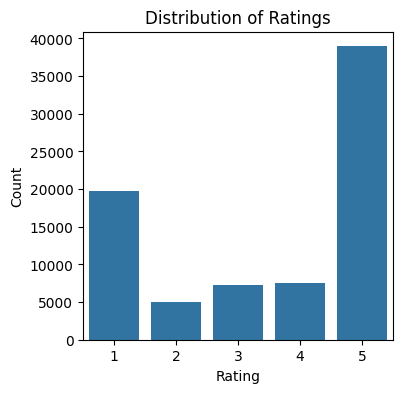

In [46]:
#Shows the distribution of rating
plt.figure(figsize=(4, 4))
sns.countplot(data=df_trustpilot, x='rating')
plt.title('Distribution of Ratings')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.show()

#Distribution shows a class imbalance

In [47]:
#Inspecting final output 

print(df_trustpilot.columns)
print(df_trustpilot.info())
print("The Trustpilot dataset has ", df_trustpilot.shape[1], "columns")
print("The Trustpilot dataset has ", df_trustpilot.shape[0], "rows")
display(df_trustpilot.head())

Index(['username', 'number_reviews', 'location', 'rating', 'text',
       'date_of_experience', 'date_posted', 'verification', 'subject',
       'answer', 'company'],
      dtype='object')
<class 'pandas.core.frame.DataFrame'>
Index: 78404 entries, 0 to 32319
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   username            78404 non-null  object        
 1   number_reviews      78404 non-null  int64         
 2   location            78404 non-null  object        
 3   rating              78404 non-null  int64         
 4   text                78404 non-null  object        
 5   date_of_experience  78404 non-null  datetime64[ns]
 6   date_posted         78404 non-null  datetime64[ns]
 7   verification        78404 non-null  object        
 8   subject             78404 non-null  object        
 9   answer              78404 non-null  object        
 10  company             78404 non-

,username,number_reviews,location,rating,text,date_of_experience,date_posted,verification,subject,answer,company
0,Rob Crane,2,CA,5,The company rep I worked with made my transact...,2024-06-15,2024-10-23 04:17:44,Redirected,The company rep I worked with made my…,0,Flashbay
1,Pat Anderson,1,US,5,I highly recommend using Flashbay. Immediately...,2024-10-16,2024-10-16 19:34:05,Verified,I highly recommend using Flashbay,0,Flashbay
2,Margarita Orlova,1,CZ,5,I had the pleasure of working with Shelby Gibs...,2024-10-10,2024-10-17 10:27:44,Verified,Great customer service,0,Flashbay
3,Paola Rivas,1,US,5,I had a fantastic experience with Brian Truong...,2024-10-21,2024-10-21 22:38:50,Verified,Outstanding Support and Attentive Service,0,Flashbay
4,Fiona Mckelvey Keenan,3,CA,5,My number-one go-to for computer accessories. ...,2024-07-11,2024-10-23 04:09:05,Not Verified,My number-one go-to for computer…,0,Flashbay


In [48]:
import os

os.makedirs('data', exist_ok=True)

csv_path = 'data/data_trustpilot_first.csv'
df_trustpilot.to_csv(csv_path, index=False)
print(f"DataFrame exported to {csv_path}")

DataFrame exported to data/data_trustpilot_first.csv
